In [1]:
from datetime import date
from random import uniform
from random import choice
import importlib

import matplotlib.pyplot as plt
from sklearn import neural_network, linear_model, svm, ensemble

from pynet import *
from stockmanager import *


importlib.reload(util)
importlib.reload(portfolio)
importlib.reload(stock)
importlib.reload(network)
importlib.reload(netutil)

<module 'pynet.netutil' from '/Users/xlanzhou/Desktop/Richard/stocks/pynet/netutil.py'>

In [2]:
# get X and y from 2005 to 2010


X = [item[4] for item in util.getStockPrice('GOOG', date(2005, 1, 4), date(2010, 1, 4))]

y = util.createTrainingData('GOOG', date(2005, 1, 4), date(2010, 1, 4), 30, 20)

In [3]:
# train nn with stock data

# nn = linear_model.SGDRegressor(alpha=0.002)
# nn = neural_network.MLPRegressor(activation='logistic')
nn = linear_model.Ridge()
# nn = svm.SVR(kernel='linear')
# nn = ensemble.AdaBoostRegressor()

TRAIN = 900
TEST = 100

nn.fit(
    [[X[j] for j in range(i, i + 60)] for i in range(TRAIN)],
    y[:TRAIN]
)

nn.score(
    [[X[j] for j in range(i, i + 60)] for i in range(TRAIN, TRAIN + TEST)],
    y[TRAIN:TRAIN+TEST]
)

0.99999999999990774

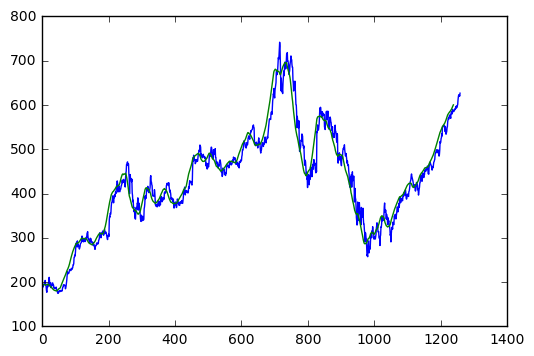

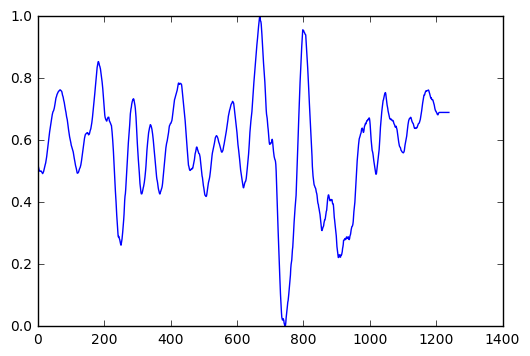

In [4]:
# Plot graphs of raw stock data & simple moving average (X) and training data (y)
plt.plot(X)
plt.plot(util.calculateSMA(X, 20))
plt.show()

plt.plot(y)
plt.show()

In [5]:
# train with xor function for baseline score


X = []
y = []
for _ in range(10000):
    a = choice([1, 10])
    b = choice([1, 10])
    X.append([a, b])
    y.append(1 if a == b else 10)


nn = neural_network.MLPRegressor(activation='logistic')

nn.fit(
    X[:9000],
    y[:9000]
)

nn.score(
    X[9000:10000],
    y[9000:10000]
)

0.99999921628594202

In [6]:
# download stock data for use in getting stock price

util.downloadStockData('CVX', date(2005, 1, 4), date(2010, 1, 4))

1259
